

# Project: Investigate Medical Appointment No shows Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not 

patients show up for their appointment. A number of characteristics about the patient are



PatientId ( identification of a patient )


AppointmentID  ( identification of each appointment )

Gender         ( it says 'F' if female or 'M' if man )

ScheduledDay   ( tells us on what day the patient set up their appointment )

AppointmentDay  ( the day of the actuall appointment, when they have to visit the doctor )

Age             ( how old is the patient )

Neighbourhood   ( indicates the location of the hospital )

Scholarship     ( indicates whether or not the patient is enrolled in scholarship )

Hipertension    ( indicates if the patient has hipertension )

Diabetes        ( indicates if the patient has diabetes )

Alcoholism     (  indicates if the patient is an alcoholic )

Handcap        ( indicates if the patient is handicaped )

SMS_received   ( 1 or more messages sent to the patient)

No-show        ( it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up)






In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

#To start the step of preprossing the dataset is neccessary to import some useful Python libraries.

#Numpy: Is a fundamental package to use linear algebra and random number capabilities. See: www.numpy.org/
#Pandas: Is a package to work with relacional data as tables. See: pandas.pydata.org/
#Matplotlib: is a plotting lybrary, usefull to plot statistical graphics. See: www.matplotlib.org
#Seaborn: is a library based on matplotlib that can draw attrative statistical graphics. See: seaborn.pydata.org/index.html
import numpy as np 
import pandas as pd
%matplotlib inline 

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

# Questions 
    
(1)What proportion of appointment shows |no shows?


(2) what is the rate of no show by patient sex ?


(3) What are the ages of people with diabetes?


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, you will load in the data, check for 

cleanliness, and then trim and clean your dataset for analysis.

Make sure that you document your steps carefully and justify your cleaning decisions.

### Loding Dataset

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv(r'C:\Users\manar.albaqami\Desktop\ProjectUdacity\noshowappointments-kagglev2-may-2016.csv')

data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Let's see the first 5 lines of the dataset.


The head method list first N rows from the DataFrame and the method tail, returns the last N row



### Data Cleaning 

> **Tip**:check for cleanliness

In [3]:


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# General observations
The dataset have 110527 observations,

14 columns and with no null values. The data types of the variables are divided in 8 integer and 6 object.


# Variables transformations

To plot some statistical graphics and for better understanding, we make some transformations in the variables:
    
PatientId : Rename to Patient_id
    
AppointmentID : Rename to Appointment_id
    
Gender: Rename to Patient_sex
    
ScheduledDay:Rename to Scheduled_day
    
AppointmentDay':Rename to Appointment_day

Hipertension:Rename to Hypertension
    
handcap:Rename to hindrance

In [4]:


data.rename(columns={'PatientId':'Patient_id','AppointmentID':'Appointment_id','Gender':'Patient_sex',
                     'ScheduledDay':'Scheduled_day','AppointmentDay':'Appointment_day',
                     'Hipertension':'Hypertension','Handcap':'hindrance','No-show':'No_show'}, inplace=True)
data.head(6)

,Patient_id,Appointment_id,Patient_sex,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


The Dataset has 110527 record and 14 columns

In [5]:
#number of samples 
#Dataset shape
data.shape



(110527, 14)

In [6]:
#cheek data type for Scheduled_day,Appointment_day

print(data['Scheduled_day'].dtype)
print(data['Appointment_day'].dtype)

object
object


In [7]:

#Scheduled_day :Convert the type of the variable from categorical to datetime type
#Appointment_day:Convert the type of the variable from categorical to datetime type
data['Scheduled_day'] = pd.to_datetime(data['Scheduled_day'])
data['Appointment_day'] = pd.to_datetime(data['Appointment_day'])


In [8]:
# verify 
data['Scheduled_day']= data['Scheduled_day'].apply(lambda x:x.strftime('%m-%d-%y'))
data['Scheduled_day'].head(3)

0    04-29-16
1    04-29-16
2    04-29-16
Name: Scheduled_day, dtype: object

In [9]:
data['Appointment_day']= data['Appointment_day'].apply(lambda x:x.strftime('%m-%d-%y'))
data['Appointment_day'].head(3)

0    04-29-16
1    04-29-16
2    04-29-16
Name: Appointment_day, dtype: object

In [10]:
data.head()

,Patient_id,Appointment_id,Patient_sex,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received,No_show
0,2.987250e+13,5642903,F,04-29-16,04-29-16,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,04-29-16,04-29-16,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,04-29-16,04-29-16,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,04-29-16,04-29-16,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,04-29-16,04-29-16,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Greated Appointment_day_of_week ,Scheduled_day_of_week columns

In [11]:

#convert Appointment_day ,Scheduled_day to datatime 

data['Appointment_day'] = pd.to_datetime(data['Appointment_day'])
data['Scheduled_day'] = pd.to_datetime(data['Scheduled_day'])

In [12]:
#Greated Appointment_day_of_week
#converting date to day  name 
#  dt.day_name() ,Return the day of the week.
data['Appointment_day_of_week'] = data['Appointment_day'].dt.day_name()
data['Appointment_day_of_week'].head(3)

0    Friday
1    Friday
2    Friday
Name: Appointment_day_of_week, dtype: object

In [13]:
#Greated Appointment_day_of_week #Greated Appointment_day_of_week
#converting date to day  name 
#  dt.day_name() ,Return the day of the week.
data['Scheduled_day_of_week'] = data['Scheduled_day'].dt.day_name()
data['Scheduled_day_of_week'].head(3)

0    Friday
1    Friday
2    Friday
Name: Scheduled_day_of_week, dtype: object

In [14]:
#Appointments per day  no show or show Patients

In [15]:
data_table=data.pivot_table(values="Scheduled_day_of_week", index=["No_show"], columns="Appointment_day_of_week",aggfunc=np.count_nonzero)
data_table

Appointment_day_of_week,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
No_show,,,,,,
No,14982,18025,30,13909,20488,20774
Yes,4037,4690,9,3338,5152,5093


Less no show ,show of patients if the appointment is on saturday

In [16]:
# how many null values are there in our dataframe
data.isnull().sum()


Patient_id                 0
Appointment_id             0
Patient_sex                0
Scheduled_day              0
Appointment_day            0
Age                        0
Neighbourhood              0
Scholarship                0
Hypertension               0
Diabetes                   0
Alcoholism                 0
hindrance                  0
SMS_received               0
No_show                    0
Appointment_day_of_week    0
Scheduled_day_of_week      0
dtype: int64

In [17]:
## check the number of unique values in each column
data.nunique()

Patient_id                  62299
Appointment_id             110527
Patient_sex                     2
Scheduled_day                 111
Appointment_day                27
Age                           104
Neighbourhood                  81
Scholarship                     2
Hypertension                    2
Diabetes                        2
Alcoholism                      2
hindrance                       5
SMS_received                    2
No_show                         2
Appointment_day_of_week         6
Scheduled_day_of_week           6
dtype: int64

In [18]:
# Check  duplicate rows 
data.duplicated().sum()

0

# Observations



no duplicate data exists in the dataset.


no missing values exist in the provided dataset.

In [19]:
data['Appointment_day'].value_counts()

2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: Appointment_day, dtype: int64

In [20]:
data.head()

,Patient_id,Appointment_id,Patient_sex,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received,No_show,Appointment_day_of_week,Scheduled_day_of_week
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [23]:
#check no show value count 

data['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [24]:
#check Diabetes value count
data['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [25]:
#check Hypertension value count
data['Hypertension'].value_counts()

0    88726
1    21801
Name: Hypertension, dtype: int64

In [26]:
#check Scholarship value count
data['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [27]:
#check SMS_received value count

data['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [28]:
#check Age value count

data['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [29]:
# Description of the data
data.describe()

,Patient_id,Appointment_id,Age,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From summary , age has min value -1 ,It is not expected that age is a negative value, so I think it is better to drop it
Also, hindrance have a max value of 4 , hindrance values is expected to be 0 or 1

In [31]:
#search  if age = -1 , and count Age
data.query('Age == -1').Age.count()

1

In [32]:
#check unique value for hindrance 
data['hindrance'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [33]:
#check hindrance value count
data['hindrance'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: hindrance, dtype: int64

In [34]:
## Percentage of total not expected Handcap values  2, ,3, 4
hindrance_unwanted = data['hindrance'].value_counts()
total =hindrance_unwanted[2]+hindrance_unwanted[3]+hindrance_unwanted[4]
(total/data.hindrance.count())* 100

0.18004650447401993

The information above discovers that there is only one negative value(-1) in age
Also, the percentage of unwanted values with hindrance represents a small percentage of 0.18, and therefore I removed it from the dataset

In [35]:
# remove by index value 

negative_age = data.query('Age ==-1').index.values
data.drop(negative_age, inplace=True) # droped and then save it

In [36]:
# Check whether the negative value is removed or not
data['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

Great job removed ( Age== -1)

In [37]:
# remove hindrance_unwanted of values 2,3,4
hindrance_unwanted = data.query('hindrance== 2 | hindrance == 3 | hindrance == 4').hindrance
# Drop the values from the dataframe
data.drop(hindrance_unwanted.index, inplace=True)

In [38]:
# Verified hindrance_unwanted value 2,3,4 is removed

data['hindrance'].value_counts()

0    108285
1      2042
Name: hindrance, dtype: int64

Great job removed ( hindrance== 2 & hindrance=3 & hindrance=4)

In [ ]:
done Data Wrangling

<a id='eda'></a>
## Exploratory Data Analysis



# 1- What  proportion of appointment shows |no shows?

In [39]:

# count number of patients show or no show 

data['No_show'].value_counts()

No     88049
Yes    22278
Name: No_show, dtype: int64

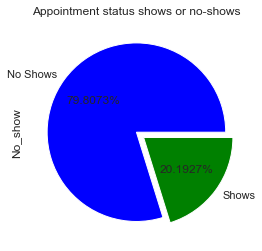

In [40]:
"""
proportion of NoShows as a piechart
"""
data.No_show.value_counts().plot.pie(figsize=(4,6), autopct='%.4f%%', explode=(0, 0.1),colors=['blue','green'],labels =['No Shows', 'Shows'])
plt.title('Appointment status shows or no-shows')
plt.show()

 20.19% of all appointments resulted in no shows. 

# 2- what is the rate of no show by patient sex ?

In [93]:
missed_ppointment=pd.DataFrame(data.groupby('Patient_sex')['No_show'].count()).apply(lambda x : x / sum(x) * 100)
missed_ppointment

,No_show
Patient_sex,
F,65.015817
M,34.984183


Famel patients are more than Male patients in no show , Famel 65% of no show ,but Male 34% of no show 

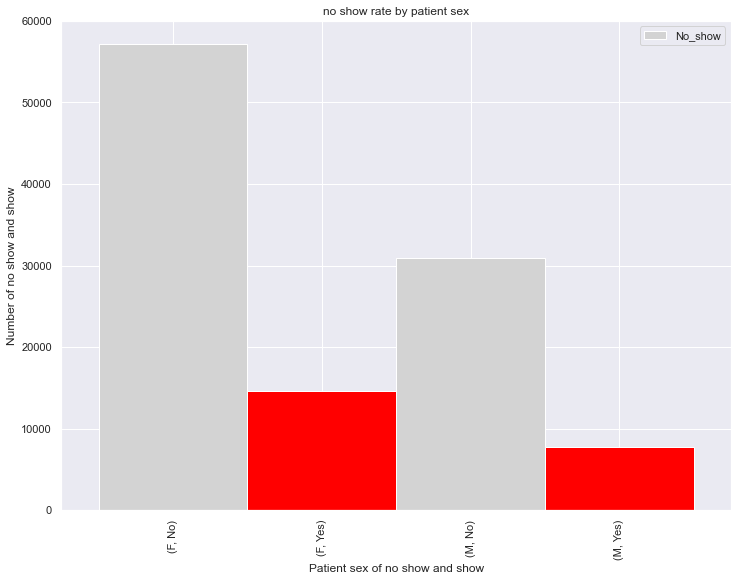

In [100]:

missed_ppointment= data.groupby('Patient_sex').No_show.value_counts().plot(kind='bar',width =1,figsize=(12,9), color=['lightgray','red'])
missed_ppointment.set_title("no show rate by patient sex")
plt.ylabel("Number of no show and show")
plt.xlabel("Patient sex of no show and show")
plt.legend(['No_show','show']);
plt.show()

Most of the missing appointments was from female

The number of female who attended the appointment greater than male.

(F,No) means female show up ,(F,Yes) means female no show

(M,No) means male show up,(M,yes) means male no show


# 3- What are the ages of people with diabetes?

In [103]:
diabetes_by_Patient_id=pd.DataFrame(data.groupby('Diabetes')['Patient_id'].count()).apply(lambda x : x / sum(x) * 100)
diabetes_by_Patient_id


,Patient_id
Diabetes,
0,92.839468
1,7.160532


92.8 Non diabetic of patients
and 7.1 diabetics

In [104]:
#age_classification
bins= [0,10,16,21,26,31,36,41,46,51,56,61,150]
labels = ['Less than 10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','More than 60']
data['classification_by_age'] = pd.cut(data['Age'], bins=bins,labels=labels, right=False)
data.groupby(['classification_by_age'])['Diabetes'].count()


classification_by_age
Less than 10    17464
10-15            6972
15-20            7361
20-25            6746
25-30            7025
30-35            7354
35-40            7673
40-45            6889
45-50            7513
50-55            7904
55-60            7735
More than 60    19691
Name: Diabetes, dtype: int64

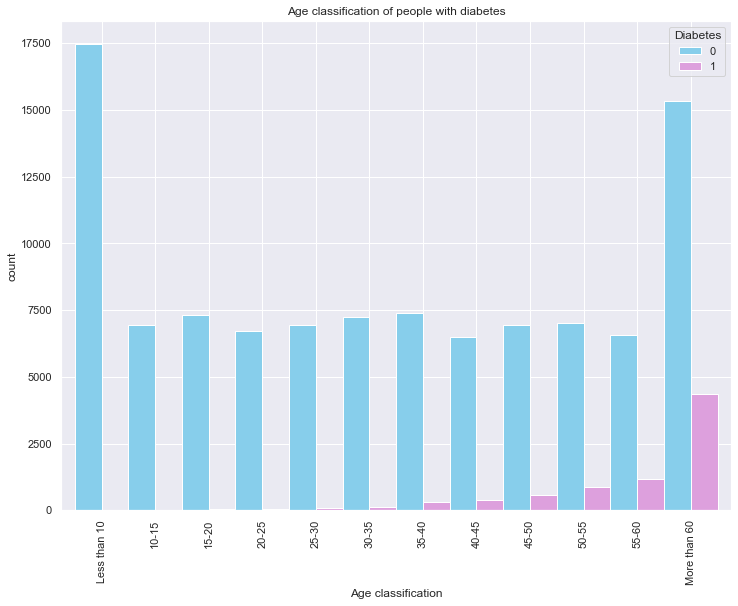

In [106]:
#Percentage of Diabetes by Age

age = data.groupby('classification_by_age')['Diabetes'].value_counts().unstack().plot(kind='bar',width =1,figsize=(12,9), color=['skyblue','plum'])
age.set_title("Age classification of people with diabetes")
age.set_xlabel('Age classification')
age.set_ylabel('count')
plt.show()


observations


-The patient's diabetes rate
Between 40 years and more than 60 years, and the highest incidence of diabetes is those at the age of 60


# conclusion


notebook was divided into 3 main steps which are Introduction , Data Wrangling , Exploratory Data Analysis


# Introduction

In this step, we do the following :

1-Importing the needed Libraries  that help us achieve our tasks.

# Data Wrangling

In this step, we do the following :

1-Loading our Dataset.

2-Checking for cleanliness and,edit data type some columns

3-Variables transformations

4-Greated Appointment_day_of_week ,Greated Appointment_day_of_week 

5-no duplicate data exists in the dataset.

6-no missing values exist in the provided dataset.

7- age has min value -1 ,It is not expected that age is a negative value, 
so I think it is better to drop it Also, hindrance have a max value of 4 , hindrance values is expected to be 0 or 1
solution by 
The information above discovers that there is only one negative value(-1) in age Also, 
the percentage of unwanted values with hindrance represents a small percentage of 0.18, 
and therefore I removed it from the dataset


# Exploratory Data Analysis

# 1-What proportion of appointment shows |no shows?

finding 79% of the patients are commited to their appointment.

20.19% of all appointments resulted in no shows. 


# 2-what is the rate of no show by patient sex 

Finding  number of female who attended the appointment greater than male

and,number of female who didn't attend the appointment greater than male


# 3- What are the ages of people with diabetes?

finding Patients with diabetes between the ages of 30 to More than 60 


highest incidence of diabetes is those at the age of 60 or More 

# Conclusions

79% of the patients are commited to their appointment.
20.19% of all appointments resulted in no shows
also,number of female who attended the appointment greater than male
and,number of female who didn't attend the appointment greater than male


# Limitations:

 
    
   1- The data set includes mistakes data like age with negtive value and 
    
hindrance have a max value of 4 , hindrance values is expected to be 0 or 1
    
   2- data type for Scheduled_day,Appointment_day object ,import convert to datetime type
    